## Import Data Set 

In [2]:
import pandas as pd


#Import training data set 
X = pd.read_csv("cs-training.csv")
X = X.drop(columns=["Unnamed: 0"])
print(X.shape)
X.head(20)

(150000, 11)


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


Check Data Type

In [3]:
# Check the data types of each column
data_types = X.dtypes

# Display the data types
print("\nData Types:")
print(data_types)


Data Types:
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


Check missing data 

In [4]:
# Count the number of missing values in each column
missing_count_per_column = X.isnull().sum()

# Display the result
print("Number of Missing Values in Each Column:")
print(missing_count_per_column)

Number of Missing Values in Each Column:
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


## EDA and Prepare data for Training

Check distribution of values in "MonthlyIncome"

In [5]:
maxx = max(X["MonthlyIncome"])
print(maxx)
minn = min(X["MonthlyIncome"])
print(minn)

3008750.0
0.0


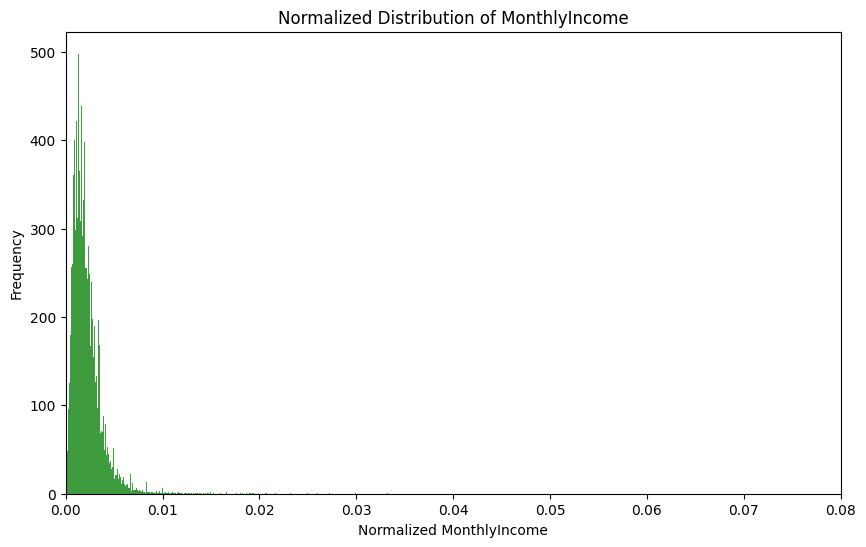

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

normalized_data = (X["MonthlyIncome"] - X["MonthlyIncome"].min()) / (X["MonthlyIncome"].max() - X["MonthlyIncome"].min())

# Plot the distribution after normalization
plt.figure(figsize=(10, 6))
sns.histplot(normalized_data, kde=False, bins = 10000, color='green',stat='density')
plt.title(f'Normalized Distribution of {"MonthlyIncome"}')
plt.xlabel(f'Normalized {"MonthlyIncome"}')
plt.ylabel('Frequency')
plt.xlim(0, 0.08)
plt.show()

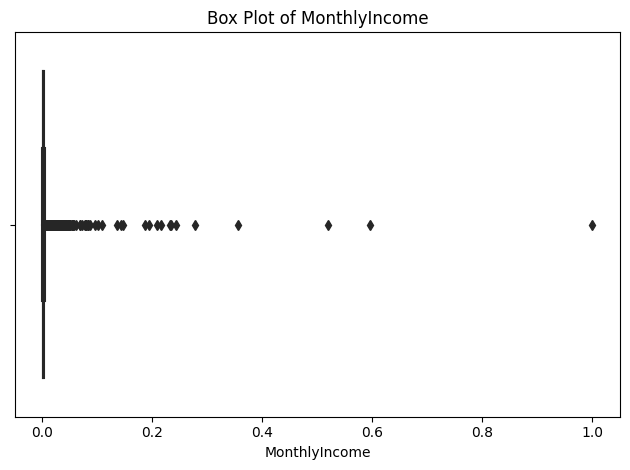

In [7]:
sns.boxplot(x=normalized_data, color='purple')
plt.title(f'Box Plot of {"MonthlyIncome"}')

plt.tight_layout()
plt.show()

Check distribution of "NumberOfDependents"

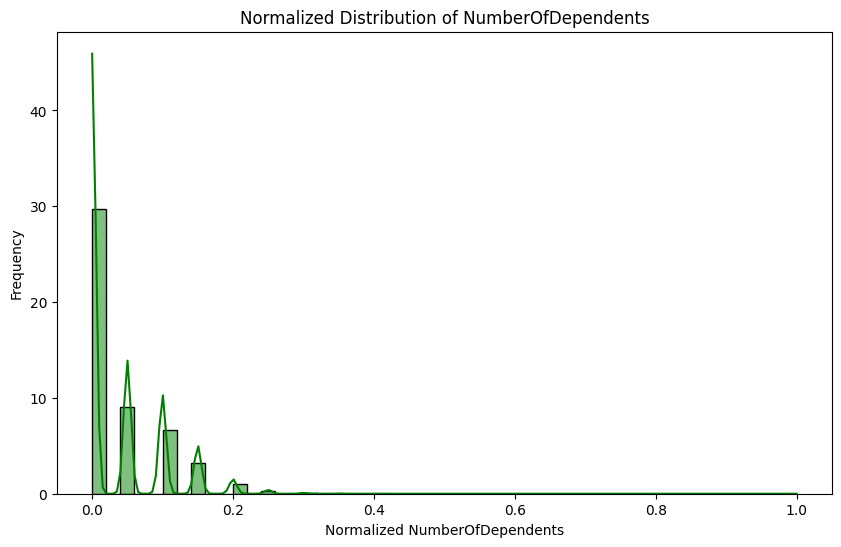

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

normalized_data = (X["NumberOfDependents"] - X["NumberOfDependents"].min()) / (X["NumberOfDependents"].max() - X["NumberOfDependents"].min())

# Plot the distribution after normalization
plt.figure(figsize=(10, 6))
sns.histplot(normalized_data, kde=True, bins = 50, color='green',stat='density')
plt.title(f'Normalized Distribution of {"NumberOfDependents"}')
plt.xlabel(f'Normalized {"NumberOfDependents"}')
plt.ylabel('Frequency')
plt.show()

Handle missing value in "MonthlyIncome" and "NumberOfDependents" with 3 method including 
* Median Imputation
* Random Sample Impuatation
* Multiple Imputation
Select the one method is closer to the distribution of the original data

In [9]:
#Median Imputation
median_value = X.median()
median_imputation = X.fillna(median_value)
median_imputation


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,3870.000000,5400.0,18,0,1,0,0.0
149998,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [10]:
#Random Sample Impuatation
def random_sample_imputation(df):
   
    cols_with_missing_values = df.columns[df.isna().any()].tolist()

    for var in cols_with_missing_values:

        # extract a random sample
        random_sample_df = df[var].dropna().sample(df[var].isnull().sum(),
                                                      random_state=0)
        # re-index the randomly extracted sample
        random_sample_df.index = df[
                df[var].isnull()].index

        # replace the NA
        df.loc[df[var].isnull(), var] = random_sample_df

    return df

X2_randomImpute = X.copy()
random_sample_imp_df = random_sample_imputation(X2_randomImpute)
random_sample_imp_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
#Multiple Imputation
!pip install miceforest

In [12]:
from miceforest import ImputationKernel

mice_kernel = ImputationKernel(
data = X,
save_all_iterations = True,
random_state = 2023
)
mice_kernel.mice(2)
mice_imputation = mice_kernel.complete_data()
mice_imputation.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


From all the imputations, it is possible to identify which one is closer to the distribution of the original "NumberOfDependents" .The result shows that distributions from ran dom imputation are perfectly overlapped with the original data.

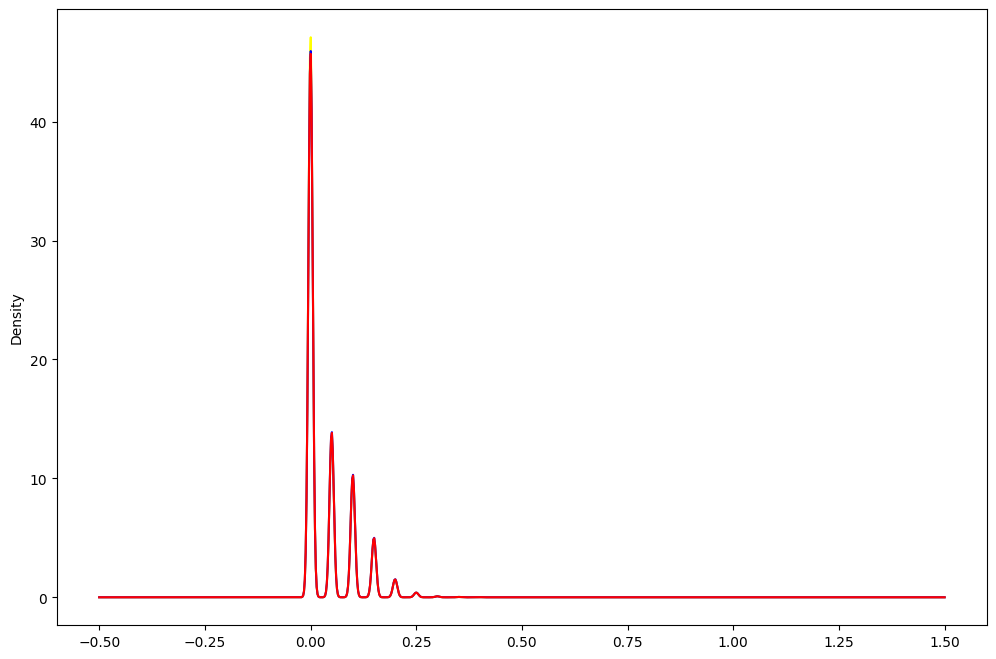

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

Nom_X2= (X["NumberOfDependents"] - X["NumberOfDependents"].min()) / (X["NumberOfDependents"].max() - X["NumberOfDependents"].min())
Nom_median_imputation2 =(median_imputation["NumberOfDependents"] - median_imputation["NumberOfDependents"].min()) / (median_imputation["NumberOfDependents"].max() - X["NumberOfDependents"].min())
Nom_random_sample_imp_df2 = (random_sample_imp_df["NumberOfDependents"] - random_sample_imp_df["NumberOfDependents"].min()) / (random_sample_imp_df["NumberOfDependents"].max() - X["NumberOfDependents"].min())
    

Nom_median_imputation2.plot(kind='kde',color='yellow')
Nom_random_sample_imp_df2.plot(kind='kde',color='blue')
Nom_X2.plot(kind='kde',color='red')

#plt.xlim(-0.25, 0.5)  # Replace x_min_value and x_max_value with your desired minimum and maximum x-axis values

# Show the plot
plt.show()

From all the imputations, it is possible to identify which one is closer to the distribution of the original "MonthlyIncome" .The result shows that all distributions are perfectly overlapped with the original data.

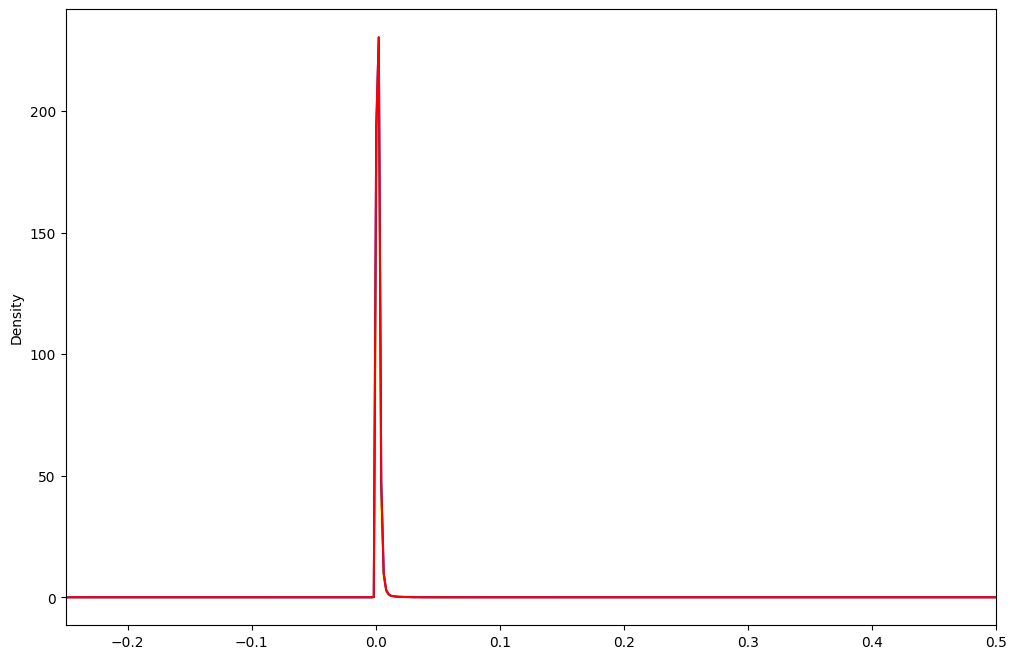

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))

Nom_X= (X["MonthlyIncome" ] - X["MonthlyIncome" ].min()) / (X["MonthlyIncome" ].max() - X["MonthlyIncome"].min())
Nom_median_imputation =(median_imputation["MonthlyIncome"] - median_imputation["MonthlyIncome"].min()) / (median_imputation["MonthlyIncome"].max() - X["MonthlyIncome"].min())
Nom_random_sample_imp_df = (random_sample_imp_df["MonthlyIncome"] - random_sample_imp_df["MonthlyIncome"].min()) / (random_sample_imp_df["MonthlyIncome"].max() - X["MonthlyIncome"].min())
    

Nom_median_imputation.plot(kind='kde',color='yellow')
Nom_random_sample_imp_df.plot(kind='kde',color='blue')
Nom_X.plot(kind='kde',color='red')

plt.xlim(-0.25, 0.5)  # Replace x_min_value and x_max_value with your desired minimum and maximum x-axis values

# Show the plot
plt.show()

As the result of comparing imputation performance, we choose random imputation as method to impute "MonthlyIncome" and "NumberOfDependents" values.

In [15]:
X_pre = random_sample_imp_df

Check Nan Value again

In [16]:
# Count the number of missing values in each column
missing_count_per_column2 = X_pre.isnull().sum()

# Display the result
print("Number of Missing Values in Each Column:")
print(missing_count_per_column2)

Number of Missing Values in Each Column:
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


## Train The models

### 1. Data preprocessing

Define X and y

In [17]:
X = X_pre.drop('SeriousDlqin2yrs', axis=1)
X.columns
X.shape

(150000, 10)

In [18]:
y = X_pre['SeriousDlqin2yrs']
y.shape

(150000,)

Train-Test Spliting Data

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124)
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
143364,1.000000,35,1,0.319822,1800.0,1,0,0,0,2.0
136572,0.030458,73,0,0.403942,7000.0,8,0,3,0,1.0
71737,0.826093,48,1,0.322591,9804.0,8,3,1,1,2.0
145321,0.060631,54,0,0.611064,10700.0,10,0,4,0,1.0
11516,0.156797,57,0,0.108978,5000.0,13,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
10702,0.944660,34,0,0.545488,13750.0,11,0,1,0,0.0
49436,0.433987,57,0,0.257610,15833.0,7,0,1,0,2.0
5652,0.546383,30,0,0.829894,4167.0,6,0,2,0,2.0
90247,0.057847,42,0,1.492515,1335.0,4,0,2,0,0.0


Make sure that the class distribution in `train`,  and `test` are almost the same by using visualization and explore class imbalance problem

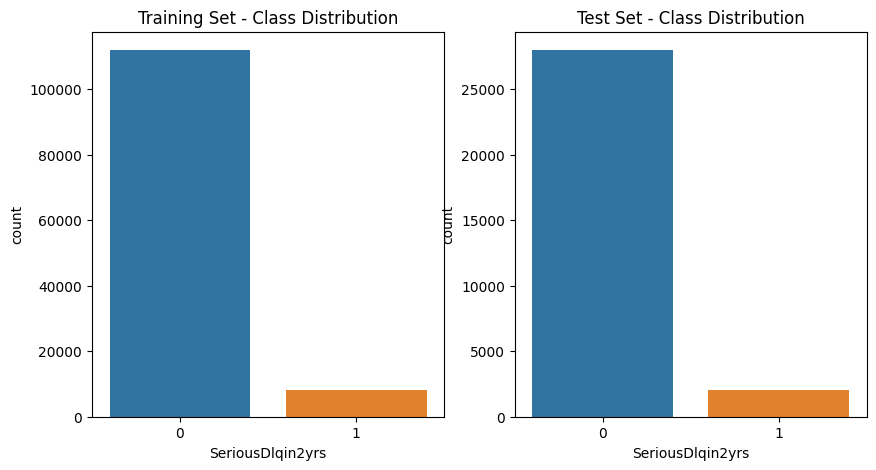

In [20]:
# Plot class distribution in training set
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Training Set - Class Distribution')

# Plot class distribution in test set
plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title('Test Set - Class Distribution')

plt.show()

## Train XGboost model 
Hyperpameter tuning with hyperopt

In [ ]:
!pip install hyperopt

In [22]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [23]:
space={'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
       'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform('n_estimators', 10, 200, 10),
       'subsample': hp.uniform('subsample', 0.5, 1),
       'seed': 0
    }

In [24]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators=int(space['n_estimators']), max_depth = int(space['max_depth']),subsample=space['subsample'],gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

Get best hyperparameters

In [27]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.5045055295037555, 'gamma': 7.616995875322389, 'learning_rate': 0.09625881944563908, 'max_depth': 17.0, 'min_child_weight': 0.0, 'n_estimators': 90.0, 'reg_alpha': 59.0, 'reg_lambda': 0.1564709462802819, 'subsample': 0.5937993573980398}


Evaluate Model Performance with ROC_AUC score with ztest set data

In [28]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Define hyperparameters
params = {
    'colsample_bytree': 0.8238535813163383,
    'gamma': 2.6535947447794612,
    'max_depth': 8,
    'learning_rate': 0.0938737326479998,
    'n_estimators': 200,
    'min_child_weight': 9,
    'reg_alpha': 44.0,
    'reg_lambda': 0.9801088542930766,
    'subsample': 0.9151483990151357,
    'objective': 'binary:logistic',  # Binary classification task
    'eval_metric': 'logloss'  # Logarithmic Loss for evaluation
}


# Create and train the XGBoost model

model = xgb.XGBClassifier(**params)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC-ROC Score: {auc_roc_score}')


AUC-ROC Score: 0.8699036378065902


Train Final model with whole data set

In [29]:
final_model = xgb.XGBClassifier(**params)
final_model.fit(X, y)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8238535813163383, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None,
              gamma=2.6535947447794612, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0938737326479998,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## Test the model with Test new dataset 

In [30]:
out = pd.read_csv("sampleEntry.csv")
out

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264
...,...,...
101498,101499,0.045363
101499,101500,0.343775
101500,101501,0.006970
101501,101502,0.121994


In [31]:
X_final_test = pd.read_csv('cs-test.csv')
X_final_test 

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [32]:
X_final_test.isna().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                            20103
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [33]:
X_final_test = X_final_test.drop(['SeriousDlqin2yrs'], axis=1)

Fill Nan Value with Ramdom Sample Imputation (same method with train data set)

In [34]:
#Random Sample Impuatation
def random_sample_imputation(df):
   
    cols_with_missing_values = df.columns[df.isna().any()].tolist()

    for var in cols_with_missing_values:

        # extract a random sample
        random_sample_df = df[var].dropna().sample(df[var].isnull().sum(),
                                                      random_state=123)
        # re-index the randomly extracted sample
        random_sample_df.index = df[
                df[var].isnull()].index

        # replace the NA
        df.loc[df[var].isnull(), var] = random_sample_df

    return df

random_sample_Xfinal = random_sample_imputation(X_final_test)
random_sample_Xfinal.head()

,Unnamed: 0,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [35]:
random_sample_Xfinal= random_sample_Xfinal.drop(["Unnamed: 0"], axis=1)
random_sample_Xfinal

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...
101498,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,0.081596,70,0,836.000000,15416.0,3,0,0,0,0.0
101501,0.335457,56,0,3568.000000,7300.0,8,0,2,1,3.0


In [36]:
result= final_model.predict_proba(random_sample_Xfinal)[:,1]
result.shape

(101503,)

Submit the result 

In [38]:
import numpy as np

In [39]:
ids = np.arange(1,101504)
res = pd.DataFrame({'Id': ids, 'Probability': result})
res



,Id,Probability
0,1,0.062092
1,2,0.042443
2,3,0.010071
3,4,0.082536
4,5,0.097417
...,...,...
101498,101499,0.030853
101499,101500,0.392972
101500,101501,0.007162
101501,101502,0.095229


In [40]:
res.to_csv("submission_result.csv", index=False)